In [1]:
import sys
sys.path.append(r'/Users/brendanliang/Code/brendans_bloomberg') 
import numpy as np
import pandas as pd
import os
import subprocess
import shlex
import matplotlib.pyplot as plt
from datetime import datetime
from tools.helper.pandas_tools import find_col_index
from interface.company import Company
from interface.indicator import Yahoo_Indicator
from interface.forex import forex

In [2]:
company = Company("META")

price history not up to date, used saved file if avalible


# Share Price History

price history not up to date, used saved file if avalible


/var/folders/wq/cty68g4x0mv13xchkmnt7md00000gn/T/ipykernel_12100/272306397.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(company.price_history.dates, company.price_history.close/float(company.price_history.close[company_index]))


price history not up to date, used saved file if avalible
price history not up to date, used saved file if avalible
price history not up to date, used saved file if avalible


/var/folders/wq/cty68g4x0mv13xchkmnt7md00000gn/T/ipykernel_12100/272306397.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.plot(Yahoo_Indicator("^GSPC").dates, Yahoo_Indicator("^GSPC").close/float(Yahoo_Indicator("^GSPC").close[benchmark_index_index]))


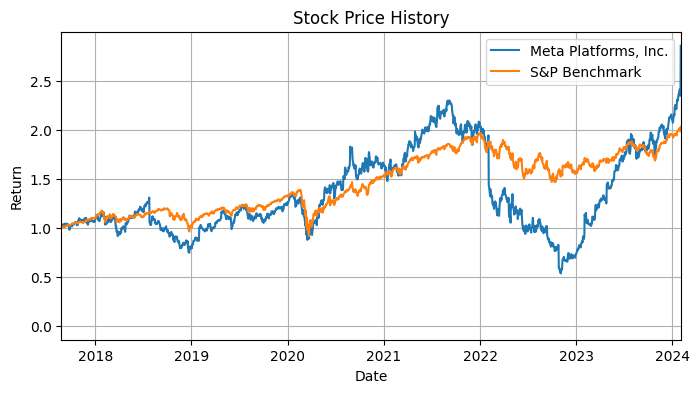

In [3]:
start_date = datetime(2017,8,25).date()
company_index = np.where(company.price_history.dates == start_date)[0]
benchmark_index_index = np.where(Yahoo_Indicator("^GSPC").dates == start_date)[0]
plt.figure(figsize=(8, 4))  # Customize the figure size if needed
plt.plot(company.price_history.dates, company.price_history.close/float(company.price_history.close[company_index]))
plt.plot(Yahoo_Indicator("^GSPC").dates, Yahoo_Indicator("^GSPC").close/float(Yahoo_Indicator("^GSPC").close[benchmark_index_index]))
plt.xlabel("Date")
plt.ylabel("Return")
plt.title("Stock Price History")
plt.grid(True)
plt.xlim(start_date, datetime.today())
plt.legend([str(company.profile.name[0]), "S&P Benchmark"])

# Financial Performance

## Income Statement

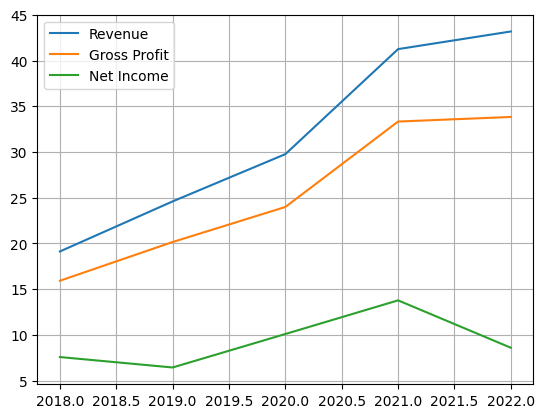

In [4]:
n = 5
fig, ax = plt.subplots()
year, revenue, gross_profit, net_income, shs_out = [], [], [], [], []
for i in range(n):
    year.append(company.annual_income_statement.income_statement[i]['calendarYear'])
    revenue.append(company.annual_income_statement.income_statement[i]['revenue'])
    gross_profit.append(company.annual_income_statement.income_statement[i]['grossProfit'])
    net_income.append(company.annual_income_statement.income_statement[i]['netIncome'])
    shs_out.append(company.annual_income_statement.income_statement[i]['weightedAverageShsOut'])
    
ax.plot(year, np.array(revenue)/np.array(shs_out), label = "Revenue")
ax.plot(year, np.array(gross_profit)/np.array(shs_out), label = "Gross Profit")
ax.plot(year, np.array(net_income)/np.array(shs_out), label = "Net Income")
ax.grid()
ax.legend()
plt.show()

## Cash Flows

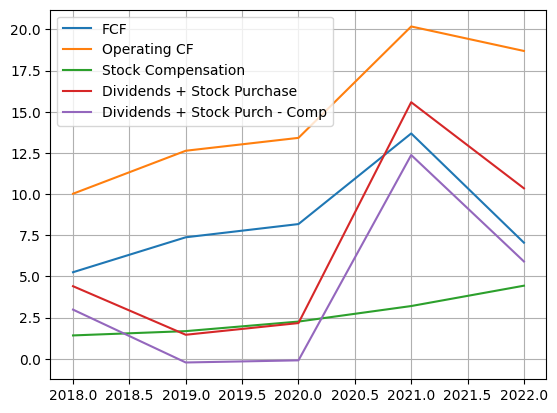

In [5]:
fig, ax = plt.subplots()
year, fcf, operating_cf, stock_comp, stock_repurchase, dividends = [], [], [], [], [], []
for i in range(n):
    year.append(company.annual_cashflow.cashflow[i]['calendarYear'])
    stock_comp.append(company.annual_cashflow.cashflow[i]['stockBasedCompensation'])
    stock_repurchase.append(company.annual_cashflow.cashflow[i]['commonStockRepurchased'])
    dividends.append(company.annual_cashflow.cashflow[i]['dividendsPaid'])
    operating_cf.append(company.annual_cashflow.cashflow[i]['operatingCashFlow'])
    fcf.append(company.annual_cashflow.cashflow[i]['freeCashFlow'])
    
ax.plot(year, np.array(fcf)/np.array(shs_out), label = "FCF")
ax.plot(year, np.array(operating_cf)/np.array(shs_out), label = "Operating CF")
ax.plot(year, np.array(stock_comp)/np.array(shs_out), label = "Stock Compensation")
ax.plot(year, (-np.array(dividends)-np.array(stock_repurchase))/np.array(shs_out), label = "Dividends + Stock Purchase")
ax.plot(year, (-np.array(stock_comp)-np.array(dividends)-np.array(stock_repurchase))/np.array(shs_out), label = "Dividends + Stock Purch - Comp")
ax.grid()
ax.legend()
plt.show()

## Balance Sheet

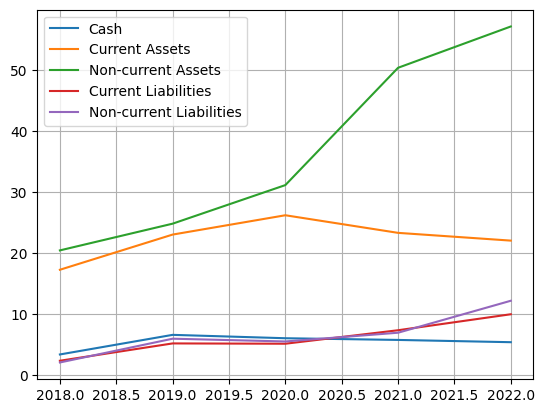

In [6]:
fig, ax = plt.subplots()
year, cashAndCashEquivalents, totalCurrentAssets, totalNonCurrenAssets, totalCurrentLiabilities, totalNonCurrentLiabilities = [], [], [], [], [], []
for i in range(n):
    year.append(company.annual_balance_sheet.balance_sheet[i]['calendarYear'])
    cashAndCashEquivalents.append(company.annual_balance_sheet.balance_sheet[i]['cashAndCashEquivalents'])
    totalCurrentAssets.append(company.annual_balance_sheet.balance_sheet[i]['totalCurrentAssets'])
    totalNonCurrenAssets.append(company.annual_balance_sheet.balance_sheet[i]['totalNonCurrentAssets'])
    totalCurrentLiabilities.append(company.annual_balance_sheet.balance_sheet[i]['totalCurrentLiabilities'])
    totalNonCurrentLiabilities.append(company.annual_balance_sheet.balance_sheet[i]['totalNonCurrentLiabilities'])
    
ax.plot(year, np.array(cashAndCashEquivalents)/np.array(shs_out), label = "Cash")
ax.plot(year, np.array(totalCurrentAssets)/np.array(shs_out), label = "Current Assets")
ax.plot(year, (np.array(totalNonCurrenAssets)-np.array(stock_repurchase))/np.array(shs_out), label = "Non-current Assets")
ax.plot(year, (np.array(totalCurrentLiabilities))/np.array(shs_out), label = "Current Liabilities")
ax.plot(year, (np.array(totalNonCurrentLiabilities))/np.array(shs_out), label = "Non-current Liabilities")
ax.grid()
ax.legend()
plt.show()

# Historical Valuations

In [8]:
from interface.data_sources.price_history import price_history
from tools.TTM_calculator import trailing_twelve_month
from datetime import datetime
ttm_cashflow = trailing_twelve_month(company.symbol, "cashflow_statement")
ttm_balance_sheet = trailing_twelve_month(company.symbol, "balance_sheet")
ttm_income_statement = trailing_twelve_month(company.symbol, "income_statement")
date = []
price_fcf = []
price_rev = []
price_earnings = []
price_book = []

# print(ttm_balance_sheet[0]["fillingDate"])
# date1 = datetime.strptime(ttm_balance_sheet[0]["fillingDate"], "%Y-%m-%d").date()
date1 = ttm_balance_sheet[0]["fillingDate"]
date2 = company.price_history.dates[0]
print(date2 < date1)

# for i in range(company.price_history.dates):
#     date = company.price_history.dates[i]
#     print(date)
    


price history not up to date, used saved file if avalible
{'date': '2011-03-31', 'symbol': 'META', 'reportedCurrency': 'USD', 'cik': 1326801, 'fillingDate': datetime.date(2011, 3, 31), 'acceptedDate': '2011-03-31 00:00:00', 'calendarYear': 2011, 'period': 'Q1', 'netIncome': 233000000, 'depreciationAndAmortization': 51000000, 'deferredIncomeTax': 69000000, 'stockBasedCompensation': 7000000, 'changeInWorkingCapital': 53000000, 'accountsReceivables': 27000000, 'inventory': 4000000, 'accountsPayables': -3000000, 'otherWorkingCapital': 29000000, 'otherNonCashItems': -68000000, 'netCashProvidedByOperatingActivities': 345000000, 'investmentsInPropertyPlantAndEquipment': -153000000, 'acquisitionsNet': -1000000, 'purchasesOfInvestments': 0, 'salesMaturitiesOfInvestments': 0, 'otherInvestingActivites': 1000000, 'netCashUsedForInvestingActivites': -153000000, 'debtRepayment': -279000000, 'commonStockIssued': 998000000, 'commonStockRepurchased': 0, 'dividendsPaid': 0, 'otherFinancingActivites': 79